# IGP Part B: Project

# Analysis on staff diversity in UK higher education institutions

### Group 4:
Brian Peavy

### Prepared for:
UWE IGP Module Leaders

### 
July 16, 2022

## Import libraries 

In [1]:
import pandas as pd
from pandas import read_excel
import matplotlib.pyplot as plt
import seaborn as sns


## Explore the data

In [11]:
#read csv data file
ukdata = pd.read_excel('/Users/duece/Downloads/ukethnicity.xlsx')

In [3]:
#view top 5 rows
ukdata.head()

,UKPRN,HE provider,White,Black,Asian,Mixed,Other,Not known,Total
0,10007760,Birkbeck College,1175,100,145,60,30,340,1855
1,10000936,The University College of Osteopathy,95,5,10,10,5,20,145
2,10000961,Brunel University London,1525,105,450,50,85,20,2235
3,10003324,The Institute of Cancer Research,825,50,140,30,15,25,1085
4,10001478,The City University,2345,155,420,100,80,125,3220


In [ ]:
#raw data information
ukdata.info()

### Taking the first glance at the head of the dataset we notice a few key points pertaining the information presented.
1. The dataset will need to go thru a CRUD process, in which we will drop the "UKPRN" column due to the irrelevancy of our project objective. We will also rename the "HE provider" column heading with "University", because we believe it best represents our findings.

An importnant note to consider is that we will not drop any dud rows from the record, because in our design thinking conversations we realize that universities could very well not have a particular ethnic group as an employee. We will analyze this inference more when we dive deeper into the minimum and maxiumum column statistics.

2. While continuing to review the preview of the data, we also can imply and justify our opiniated and educated perspective about the skewed representation of staff diversity pertaining to ethnicity in the Greater London higher educational institutions. At a quick glance we recognize the "White" representaion in the first 5 universities listed amounting to over 50 percent of the total collective of staff. This insight led us to more curiousity about the numerical value of what makes up the populaton of Greater London. 

3. After further research and selective reasoning we will contiunue with the column "Other" and note the description of the ethnic group as a blend of .....

In [22]:
#drop column 1
ukdfclean = ukdata.drop(['UKPRN'], axis=1)

In [52]:
#rename column
ukdfclean.rename({'HE provider': 'University'}, axis=1, inplace=True)
ukdfclean

In [23]:
#get column statistics
ukdfclean.describe()

#Data table summary

,White,Black,Asian,Mixed,Other,Not known,Total
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,1433.205128,106.794872,243.846154,64.615385,44.230769,166.923077,2059.487179
std,1835.407056,109.144322,348.418346,82.145447,63.489934,290.355081,2623.304915
min,70.000000,0.000000,5.000000,0.000000,0.000000,0.000000,80.000000
25%,517.500000,17.500000,20.000000,15.000000,5.000000,20.000000,585.000000
50%,825.000000,75.000000,125.000000,40.000000,25.000000,35.000000,1295.000000
75%,1462.500000,157.500000,257.500000,62.500000,52.500000,205.000000,2092.500000
max,9115.000000,385.000000,1435.000000,385.000000,300.000000,1280.000000,12900.000000


### We took a deeper rough dive into the statistics and we must say we are not suprised.
Out of the 39 higher educational institutions in the Greater London Area we've come to a statistical finding that not all ethinicties are represented equally nor to a demographic ratio of % which they make up in Greater London according to () . This leads us to many concerning topics that we will explore throughout this analysis to create awareness.
Would you believe that the "Asian" ethinicity would statistically represent the second most employeed staff in London? What about the "Black" ethnicity average totaling less than half of the "Asian" ethnic background to be stamped as the 3rd highest. 

Is it suprising that the "White" ethnic representaion has roughly under 56,000 employees out of the collective 80,320 staff members allocated. When one ethinicity group is the construct of around 70% of staff in an area that should and we would hope the matter would raise concerns, as well as, red flags about staff diversity.  


In [94]:
#get df entries and type
ukdfclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   University  39 non-null     object
 1   White       39 non-null     int64 
 2   Black       39 non-null     int64 
 3   Asian       39 non-null     int64 
 4   Mixed       39 non-null     int64 
 5   Other       39 non-null     int64 
 6   Not known   39 non-null     int64 
 7   Total       39 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 2.6+ KB


In [29]:
#list of universities represented
ukdfclean['University']

0                                      Birkbeck College
1                  The University College of Osteopathy
2                              Brunel University London
3                      The Institute of Cancer Research
4                                   The City University
5                     Conservatoire for Dance and Drama
6                            Courtauld Institute of Art
7                         The University of East London
8                                    Goldsmiths College
9                           The University of Greenwich
10                  Guildhall School of Music and Drama
11                                     Heythrop College
12    Imperial College of Science, Technology and Me...
13                                King's College London
14                                  Kingston University
15                       University of the Arts, London
16                               London Business School
17     University of London (Institutes and acti

In [ ]:
# A few columns to sum
df['Sum'] = ukdfclean['White'] + ukdfclean['Black'] + ukdfclean['Asian']

In [53]:

ukdfclean = ukdfclean.iloc[: , :-1]

In [96]:
#sum of each ethnicity
uktotal = ukdfclean.iloc[:,1:].sum()
uktotal

White        55895
Black         4165
Asian         9510
Mixed         2520
Other         1725
Not known     6510
Total        80320
dtype: int64

In [115]:
#df of average staff member by ethnicity 

avg = [['White', uktotal['White'] / uktotal['Total']],
      ['Asian', uktotal['Asian'] / uktotal['Total']],
      ['Black', uktotal['Black'] / uktotal['Total']],
      ['Mixed', uktotal['Mixed'] / uktotal['Total']],
      ['Other ', uktotal['Other '] / uktotal['Total']],
      ['Not known', uktotal['Not known'] / uktotal['Total']]]
  
# Create the pandas DataFrame
avgstaff = pd.DataFrame(avg, columns=['Ethnicity', 'Avg'])
avgstaff

,Ethnicity,Avg
0,White,0.695904
1,Asian,0.118401
2,Black,0.051855
3,Mixed,0.031375
4,Other,0.021477
5,Not known,0.081051


The Figure above represents the average staff member by ethnicity and reveals just how diverse higher educaitonal institutions are in Greater London. The 'white' ethnicity group boastfully making up around (70%) of total staff members while considering all other minority ethnicities (excluding 'other' and 'not known') collectively combined amounting to (20%).

In [119]:
#average of minority ethnicities (excluding other and not known)
avgstaff.loc[1 : 3].sum()

Ethnicity    AsianBlackMixed
Avg                 0.201631
dtype: object

In [120]:
#CRUD dataset
ukdfclean

,University,White,Black,Asian,Mixed,Other,Not known,Total
0,Birkbeck College,1175,100,145,60,30,340,1855
1,The University College of Osteopathy,95,5,10,10,5,20,145
2,Brunel University London,1525,105,450,50,85,20,2235
3,The Institute of Cancer Research,825,50,140,30,15,25,1085
4,The City University,2345,155,420,100,80,125,3220
5,Conservatoire for Dance and Drama,490,20,20,15,0,35,585
6,Courtauld Institute of Art,115,0,5,5,5,5,135
7,The University of East London,980,165,255,65,40,30,1530
8,Goldsmiths College,1325,115,115,80,35,210,1875
9,The University of Greenwich,1535,160,260,50,25,170,2200


In [141]:
#average white staff members
limit = 0.695904

#total Universities with more than the average white staff members
(ukdfclean['whiteavg'] > limit ).sum()


25

There were an average of (69.6%) white staff members representing the 39 Universities in the dataset. Amongst those 39 higher educational institutions we established that 25 of those campuses hosted a greater amount than the collective average (69.6%). With the highest member of the group being Trinity Laban Conservatoire of Music and Dance institution with an average of (93%) of the staff members being of the majority white ethinic group. University of the Arts, London owns the privilege for equating to the lowest avergae at (52%) slightly still enabling the majority of white staff members to reside over (50%) of the workforce.

In [124]:
#add a column that averages white staff members
ukdfclean['whiteavg'] = ukdfclean['White']/ukdfclean['Total']
ukdfclean

#sort columns by white avg descending
ukdfclean.sort_values(by=['whiteavg'], ascending = False)

,University,White,Black,Asian,Mixed,Other,Not known,Total,whiteavg
35,Trinity Laban Conservatoire of Music and Dance,545,15,10,5,0,5,585,0.931624
10,Guildhall School of Music and Drama,750,15,20,20,5,20,830,0.903614
29,Royal College of Music,390,10,15,0,0,20,435,0.896552
26,Rose Bruford College,115,0,5,5,5,0,130,0.884615
11,Heythrop College,70,0,5,0,0,0,80,0.875000
31,The Royal Veterinary College,815,30,50,25,5,25,950,0.857895
6,Courtauld Institute of Art,115,0,5,5,5,5,135,0.851852
27,Royal Academy of Music,360,5,10,5,5,35,425,0.847059
5,Conservatoire for Dance and Drama,490,20,20,15,0,35,585,0.837607
30,The Royal Central School of Speech and Drama,135,10,5,10,5,0,165,0.818182


In [142]:
#sort columns by white avg ascending
ukdfclean.sort_values(by=['whiteavg'], ascending = True)

,University,White,Black,Asian,Mixed,Other,Not known,Total,whiteavg
15,"University of the Arts, London",1895,195,185,105,30,1250,3655,0.518468
34,SOAS University of London,710,75,270,60,90,85,1295,0.548263
25,Roehampton University,925,140,95,50,10,340,1560,0.592949
19,London South Bank University,1170,245,240,55,40,225,1970,0.593909
0,Birkbeck College,1175,100,145,60,30,340,1855,0.633423
7,The University of East London,980,165,255,65,40,30,1530,0.640523
18,London Metropolitan University,625,105,130,35,40,30,965,0.647668
1,The University College of Osteopathy,95,5,10,10,5,20,145,0.655172
23,Queen Mary University of London,3615,355,1005,190,115,190,5465,0.661482
32,St George's Hospital Medical School,635,50,115,30,25,95,950,0.668421


In [143]:
#most staff members descending
ukdfclean.sort_values(by=['Total'], ascending = False)

,University,White,Black,Asian,Mixed,Other,Not known,Total,whiteavg
36,University College London,9115,385,1435,385,300,1280,12900,0.706589
13,King's College London,6160,345,1005,275,235,370,8390,0.734207
12,"Imperial College of Science, Technology and Me...",5710,360,1230,255,145,575,8275,0.690030
23,Queen Mary University of London,3615,355,1005,190,115,190,5465,0.661482
20,London School of Economics and Political Science,2580,210,580,140,85,230,3825,0.674510
15,"University of the Arts, London",1895,195,185,105,30,1250,3655,0.518468
4,The City University,2345,155,420,100,80,125,3220,0.728261
38,The University of Westminster,1780,165,265,80,65,200,2555,0.696673
2,Brunel University London,1525,105,450,50,85,20,2235,0.682327
9,The University of Greenwich,1535,160,260,50,25,170,2200,0.697727


In [ ]:
uksolo = ukdfclean.iloc[:,1:7].sum()
uksolo

<AxesSubplot:title={'center':'Diversity in Greater London University Staff Members'}, ylabel='Ethnicities'>

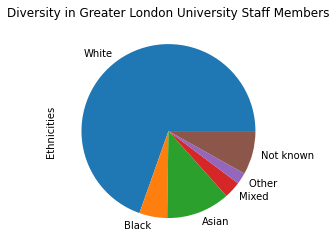

In [152]:
#pie chart reflecting total count of diversity staff members
uksolo.plot.pie(ylabel = "Ethnicities", title='Diversity in Greater London University Staff Members')


<AxesSubplot:title={'center':'Ethnic Diversity in Higher Education of London Staff'}>

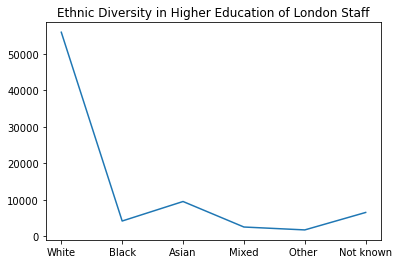

In [84]:
#line plot reflecting total count of diversity staff members
uksolo.plot.line(title='Ethnic Diversity in Higher Education of London Staff')

<AxesSubplot:title={'center':'Diversity in Higher Education of London Staff'}>

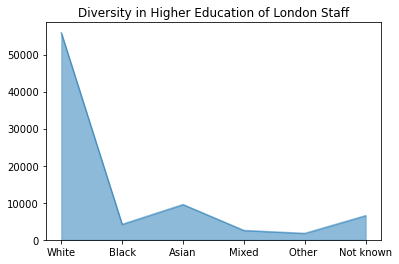

In [87]:
uksolo.plot.area(title='Diversity in Higher Education of London Staff', stacked=False)

In [90]:
#data ordered by "White" ethnicity descending
ukdfclean.sort_values(by=['White'], ascending = False)

,University,White,Black,Asian,Mixed,Other,Not known,Total
36,University College London,9115,385,1435,385,300,1280,12900
13,King's College London,6160,345,1005,275,235,370,8390
12,"Imperial College of Science, Technology and Me...",5710,360,1230,255,145,575,8275
23,Queen Mary University of London,3615,355,1005,190,115,190,5465
20,London School of Economics and Political Science,2580,210,580,140,85,230,3825
4,The City University,2345,155,420,100,80,125,3220
15,"University of the Arts, London",1895,195,185,105,30,1250,3655
38,The University of Westminster,1780,165,265,80,65,200,2555
9,The University of Greenwich,1535,160,260,50,25,170,2200
2,Brunel University London,1525,105,450,50,85,20,2235


### What's the coorelation in total staff members and the percentage of diversity at individual institutions?
We wondered could there be a trend of more diversity based on locations of educational campuses. This dataset alone can't validate the theory of the rise of diversity depending on location without further research of geographical landmarks. Therefore, we decided to explore and analyze the top 3 instutions based on the dataframe descending in order by "White" staff members. Before adding extra insight with research, we can acknowledge what seems to be like a peak for other ethnicity groups besides white and asian. Meaning the statistical numbers doesn't seem to have much infuluence on whether the collective staff members total count increases or decreases. This implies that there's no coorelation in the percentage of population increasing and selective groups following a trend. 
A real life example of this theory would be when a company is seeking to expand, who are the new hirees and in this case it seems to be skewed or rather in favor of the majority. 

In [71]:
#sum of ethnicity total staff members
ukdfclean.sum()

University    Birkbeck CollegeThe University College of Oste...
White                                                     55895
Black                                                      4165
Asian                                                      9510
Mixed                                                      2520
Other                                                      1725
Not known                                                  6510
Total                                                     80320
dtype: object

<AxesSubplot:title={'center':'Ethnic Representation by The Average'}>

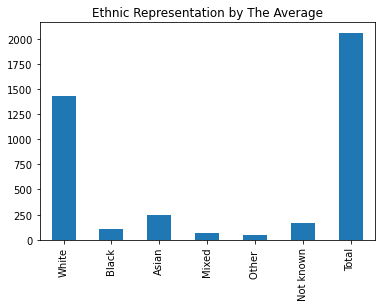

In [31]:
#bar graph of average staff members
ukdfclean.mean().plot(kind='bar', title='Ethnic Representation by The Average')